In [46]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [47]:
def get_rounds(data):
    rounds_count = 0  
    Flag = True
    for battle in data:  
        for operation in battle["rounds"][-1]["operation_history"]:
            if operation["operation"]=="run":
                Flag = False
        if Flag:
            rounds_count+=1
    return rounds_count

In [48]:
def get_sub_battle(data):
    battle_count = 0
    for battle in data:
        for op in battle["rounds"][-1]["operation_history"]:
            try:
                int(op["operation"])
                battle_count += 1
            except ValueError:
                ...
    return battle_count

In [49]:
def token_distribution(data):
    token_list=[]
    for battle in data:
        token_list.append(battle["total_usage_token"])
    token_array=np.array(token_list)
    mean = np.mean(token_array)
    sigma = np.std(token_array,ddof=1)
    print(mean)
    print(sigma)

    x = np.linspace(mean - 3 * sigma, mean + 3 * sigma, 100)
    pdf = norm.pdf(x, loc=mean, scale=sigma)
    bins = np.linspace(min(token_list), max(token_list), 10)
    counts, bin_edges = np.histogram(token_list, bins=bins)
    
    plt.hist(token_list, bins=bins, color='g', alpha=0.6, label='Histogram')
    pdf_counts = pdf * (bin_edges[1] - bin_edges[0]) * len(token_list)
    plt.plot(x, pdf_counts, color='r', label='Estimated Normal Distribution')
    
    plt.xlim(min(token_list), max(token_list))
    plt.xlabel("$token$")
    plt.ylabel("$counts$")
    plt.legend(loc="best")
    plt.show()


43
14
3236.5
2769.2228776596958


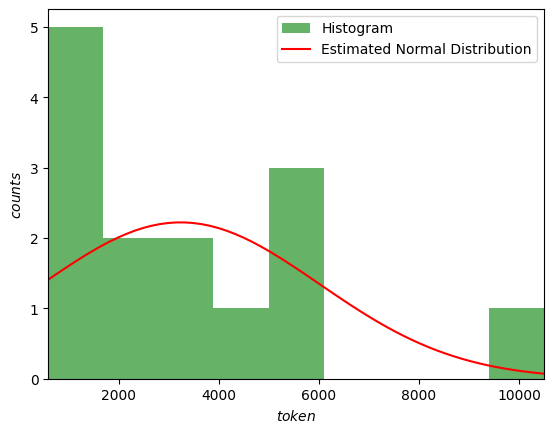

In [50]:
user_path = input()
file_path = Path(user_path).resolve()
if not file_path.exists():
    print("The file does not exist.")
    exit(0)
with open(file_path, "r", encoding="utf-8") as file:
    data = json.loads(file.read())
print(get_sub_battle(data))
print(get_rounds(data))
token_distribution(data)